In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statistics as st
from astropy.io import ascii
import sys
import imp
from tqdm import tqdm
sys.path.insert(0, '/Users/H/INVERSE/Python/')

import freedrift
imp.reload(freedrift)
# from scipy.io import FortranFile
# import struct

<module 'freedrift' from '/Users/H/INVERSE/Python/freedrift.py'>

In [2]:
location =  % pwd
location

'/Users/H/INVERSE/Code_dev/NA_geo'

In [3]:
# constants
rhoa = 1.25 
rhoi = 917.0 
rhoo = 1026.0 
fc   = 1.46e-4 

# going to pass N2a and rop ranges directly now

Ca     = 5e-3
ThetaA = np.deg2rad(5)
Co     = 1e-2
ThetaO = np.deg2rad(20) # original

# invert for thO and thA-thO
# # these replace for thO
# thA_min = ThetaO - np.deg2rad(90)
# thA_max = ThetaO + np.deg2rad(90)
# # these replace for thA-thO
# thO_min = (ThetaA - ThetaO) - np.deg2rad(90)
# thO_max = (ThetaA - ThetaO) + np.deg2rad(90)
# these replace for thO
thA_min =  - np.deg2rad(90)
thA_max =  + np.deg2rad(90)
# these replace for thA-thO
thO_min =  - np.deg2rad(90)
thO_max =  + np.deg2rad(90)


nansen_use = freedrift.nansen(Ca,Co)**2
rossby_use = freedrift.rossby_pp(Co)
n2a_min = nansen_use*1e-1
n2a_max = nansen_use*2e0
rop_min = rossby_use*1e-1
rop_max = rossby_use*4e0
# n2a_min = nansen_use-1e-4
# n2a_max = nansen_use+1e-4
# rop_min = rossby_use*1e-1
# rop_max = rossby_use*1e2
print(n2a_min, np.sqrt(nansen_use), nansen_use, n2a_max)
print(rop_min, rossby_use, rop_max)

6.09161793372e-05 0.02468120324 0.000609161793372 0.00121832358674
8.937621832358674 89.37621832358674 357.50487329434696


In [4]:
nbals = 5
hice = np.ndarray([nbals])
hifc = np.ndarray([nbals])
hice[0] = 1.0e-0
hifc[0] = hice[0]*fc
hice[1] = 1.0e-0
hifc[1] = hice[1]*fc
hice[2] = 0.9e-0
hifc[2] = hice[2]*fc
hice[3] = 0.9e-0
hifc[3] = hice[3]*fc
hice[4] = 1.0e-0
hifc[4] = hice[4]*fc

In [5]:
# changing to dimensional errors
wind_mag = np.ndarray([nbals])
wind_ang = np.ndarray([nbals])
wind_sig = np.ndarray([nbals])
uwind = np.ndarray([nbals])
vwind = np.ndarray([nbals])
ice_mag = np.ndarray([nbals])
ice_ang = np.ndarray([nbals])
ice_sig = np.ndarray([nbals])
uice = np.ndarray([nbals])
vice = np.ndarray([nbals])
ocn_mag = np.ndarray([nbals])
ocn_ang = np.ndarray([nbals])
ocn_sig = np.ndarray([nbals])
uocn = np.ndarray([nbals])
vocn = np.ndarray([nbals])
# set up wind and ocean
wind_mag[0] = 1.1
wind_ang[0] = np.deg2rad(0)
wind_sig[0] = 0.1*wind_mag[0]
uwind[0]    = wind_mag[0]*np.cos(wind_ang[0])
vwind[0]    = wind_mag[0]*np.sin(wind_ang[0])
ocn_mag[0]  = 0.1
ocn_ang[0]  = np.deg2rad(10)
ocn_sig[0] = 0.01*ocn_mag[0]  
uocn[0]     = ocn_mag[0]*np.cos(ocn_ang[0])
vocn[0]     = ocn_mag[0]*np.sin(ocn_ang[0])

wind_mag[1] = 2.1
wind_ang[1] = np.deg2rad(15)
wind_sig[1] = 0.1*wind_mag[1]
uwind[1]    = wind_mag[1]*np.cos(wind_ang[1])
vwind[1]    = wind_mag[1]*np.sin(wind_ang[1])
ocn_mag[1]  = 0.02
ocn_ang[1]  = np.deg2rad(-49)
ocn_sig[1] = 0.01*ocn_mag[1]
uocn[1]     = ocn_mag[1]*np.cos(ocn_ang[1])
vocn[1]     = ocn_mag[1]*np.sin(ocn_ang[1])

wind_mag[2] = 0.6
wind_ang[2] = np.deg2rad(110)
wind_sig[2] = 0.1*wind_mag[2]
uwind[2]    = wind_mag[2]*np.cos(wind_ang[2])
vwind[2]    = wind_mag[2]*np.sin(wind_ang[2])
ocn_mag[2]  = 0.06
ocn_ang[2]  = np.deg2rad(63)
ocn_sig[2] = 0.01*ocn_mag[2]
uocn[2]     = ocn_mag[2]*np.cos(ocn_ang[2])
vocn[2]     = ocn_mag[2]*np.sin(ocn_ang[2])

wind_mag[3] = 0.5
wind_ang[3] = np.deg2rad(12)
wind_sig[3] = 0.1*wind_mag[3]
uwind[3]    = wind_mag[3]*np.cos(wind_ang[3])
vwind[3]    = wind_mag[3]*np.sin(wind_ang[3])
ocn_mag[3]  = 0.03
ocn_ang[3]  = np.deg2rad(135)
ocn_sig[3] = 0.01*ocn_mag[3]
uocn[3]     = ocn_mag[3]*np.cos(ocn_ang[3])
vocn[3]     = ocn_mag[3]*np.sin(ocn_ang[3])

wind_mag[4] = 4.0
wind_ang[4] = np.deg2rad(1)
wind_sig[4] = 0.1*wind_mag[4]
uwind[4]    = wind_mag[4]*np.cos(wind_ang[4])
vwind[4]    = wind_mag[4]*np.sin(wind_ang[4])
ocn_mag[4]  = 0.001
ocn_ang[4]  = np.deg2rad(-114)
ocn_sig[4] = 0.1*ocn_mag[4]
uocn[4]     = ocn_mag[4]*np.cos(ocn_ang[4])
vocn[4]     = ocn_mag[4]*np.sin(ocn_ang[4])

# Ca_min = 1.0e-6
# Ca_max = 2.0e-3
# Co_min = 1.0e-3
# Co_max = 6.0e-2

In [6]:
# now generate arbitrary synthetic values
# generate wnd and geo and create the o_i
nbals = 20
hice = np.ndarray([nbals])
hifc = np.ndarray([nbals])
wind_mag = np.ndarray([nbals])
wind_ang = np.ndarray([nbals])
wind_sig = np.ndarray([nbals])
uwind = np.ndarray([nbals])
vwind = np.ndarray([nbals])
ice_mag = np.ndarray([nbals])
ice_ang = np.ndarray([nbals])
uice = np.ndarray([nbals])
vice = np.ndarray([nbals])
geo_mag = np.ndarray([nbals])
geo_ang = np.ndarray([nbals])
ugeo = np.ndarray([nbals])
vgeo = np.ndarray([nbals])
for i in range(nbals):
    wind_mag[i] = np.random.normal(loc=3.0,scale=3)
#     wind_mag[i] = np.random.uniform(0,10.0)
    wind_mag[i] = np.max([wind_mag[i],0.5])
    wind_ang[i] = np.random.uniform(-90,90)
    uwind[i]    = wind_mag[i]*np.cos(np.deg2rad(wind_ang[i]))
    vwind[i]    = wind_mag[i]*np.sin(np.deg2rad(wind_ang[i]))
    geo_mag[i]  = np.random.normal(loc=0.04,scale=0.04)
    geo_mag[i] = np.max([geo_mag[i],0.005])
#     geo_ang[i] = np.random.uniform(-45,135)
    geo_ang[i] = np.random.uniform(-50,50)
    ugeo[i]     = geo_mag[i]*np.cos(np.deg2rad(geo_ang[i]))
    vgeo[i]     = geo_mag[i]*np.sin(np.deg2rad(geo_ang[i]))
    hice[i] = np.random.normal(loc=0.9,scale=0.3)
    hice[i] = np.max([hice[i],0.5])
    hifc[i] = hice[i]*fc

3.52374881416 0.0816766296445 0.054953061687 0.023178902343
3.98551797417 0.0794329757645 0.0763215729568 0.0199304020906
0.5 0.0417662332019 0.114192724724 0.0835324664037
4.12560485483 0.109451863758 0.062296659162 0.0265298950358
4.72229775628 0.119422017522 0.0290437434606 0.0252889639082
3.25938680939 0.0636610373167 0.005 0.0195315993589
5.97143244565 0.163551094287 0.0530392036452 0.0273889214649
4.26629813085 0.119703288553 0.0386886934776 0.0280578817704
3.75909945036 0.0978120312839 0.0670579808759 0.0260200701194
3.47640882025 0.0890437076702 0.0229482170989 0.0256137043352
6.80840711814 0.189503378971 0.0290375979605 0.027833731985
5.48523498748 0.135520621012 0.0299516839683 0.0247064385248
5.79980384937 0.161620523005 0.0138754599724 0.0278665498356
6.08806793413 0.15589701303 0.005 0.0256069765839
0.957359971812 0.0235295743549 0.005 0.0245775623044
4.53052790418 0.108507493424 0.0360479859598 0.0239502980049
3.21206131012 0.0654300289359 0.0676656881615 0.0203701058662


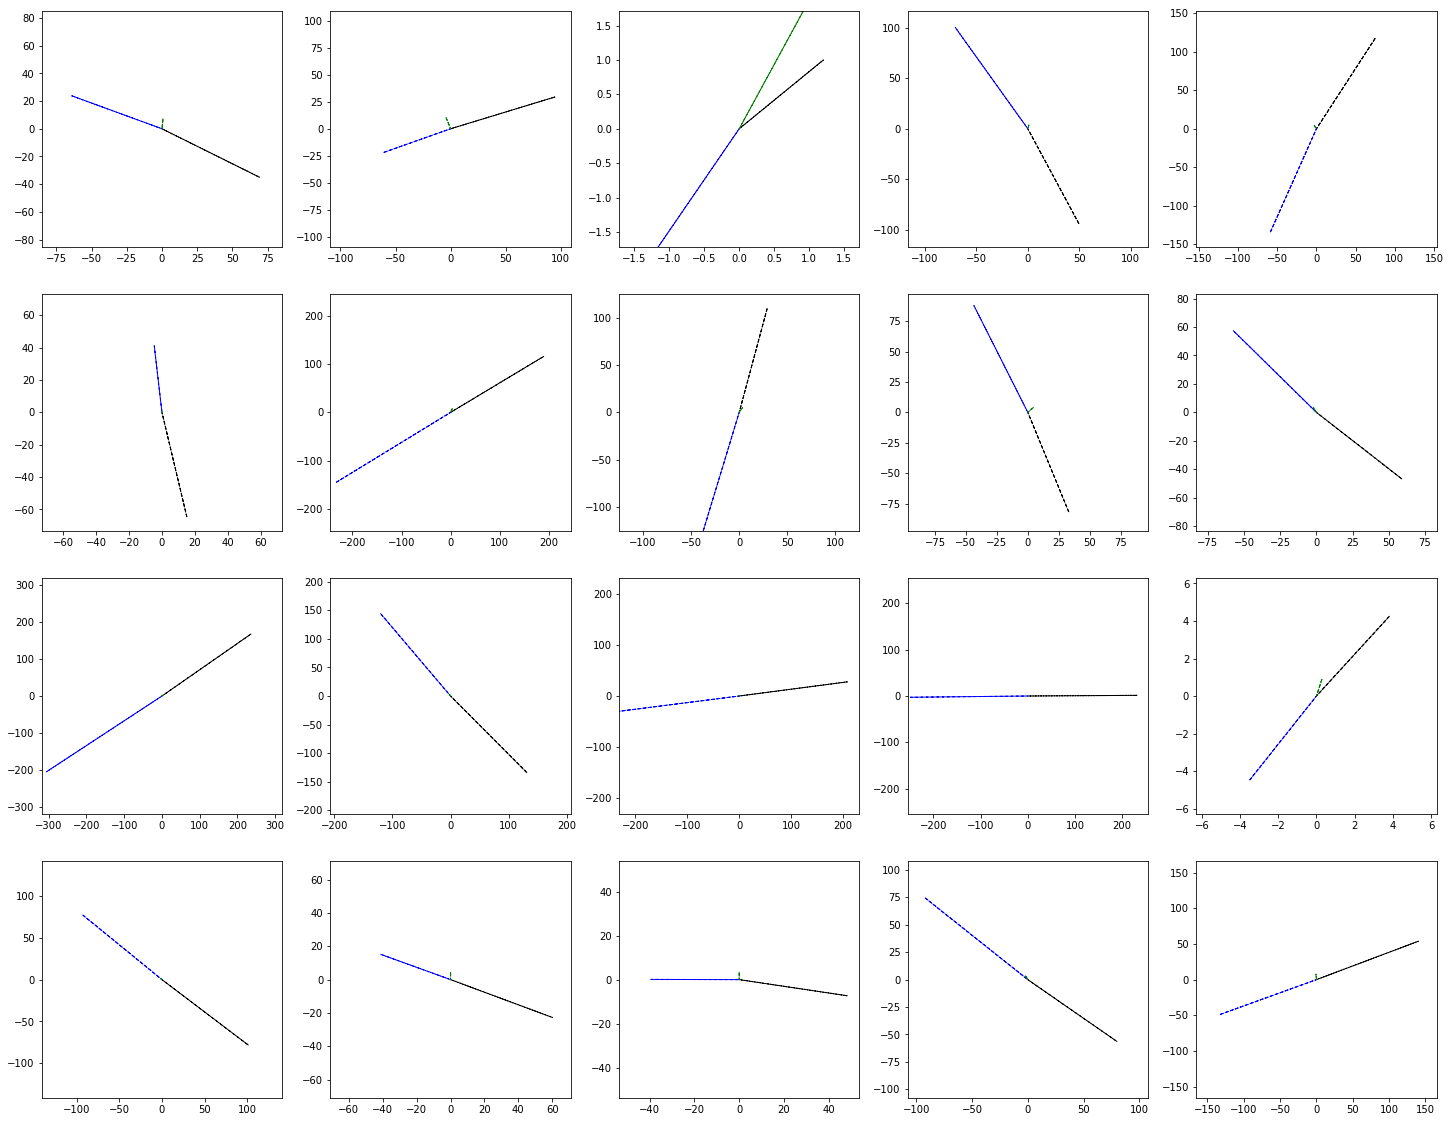

In [7]:
ice_ocn_mag = np.ndarray([nbals])
na2 = np.ndarray([nbals])
rop = np.ndarray([nbals])
thA = np.ndarray([nbals])
thO = np.ndarray([nbals])
o_i_mag = np.ndarray([nbals])
o_i_sig = np.ndarray([nbals])
geo_sig = np.ndarray([nbals])
uo_i = np.ndarray([nbals])
vo_i = np.ndarray([nbals])
sig_c = 0.2# plus/minus lever for random error
sig_w = 0.2
sig_i = 0.2
sig_g = 0.2
# problem 1

for i in range(nbals):
    Na2 = freedrift.nansen(Ca,Co)**2*np.random.normal(loc=1.0,scale=sig_c)
    RoP = freedrift.rossby_pp(Co)*hifc[i]*np.random.normal(loc=1.0,scale=sig_c)
    ThA = ThetaA*np.random.normal(loc=1.0,scale=sig_c)
    ThO = ThetaO*np.random.normal(loc=1.0,scale=sig_c)
    uo_i[i],vo_i[i] = freedrift.o_i_mag_geo(uwind[i],vwind[i],ugeo[i],vgeo[i],
                 Na2,RoP,ThA,ThO)
    o_i_mag[i]     = np.hypot(uo_i[i],vo_i[i])
    wind_sig[i] = sig_w*wind_mag[i]
    o_i_sig[i] = sig_i*o_i_mag[i]
    geo_sig[i] = sig_g*geo_mag[i]
[print(wind_mag[i],o_i_mag[i],geo_mag[i],o_i_mag[i]/wind_mag[i])  for i in range(nbals)];
# [print(wind_sig[i],o_i_sig[i])  for i in range(nbals)];

# disassemble forces
# forcing_1
orig_forces = np.empty([nbals,6])
# for j in tqdm(data_NA['number']-1):
for i in range(nbals):
    orig_forces[i,:] = freedrift.force_bal_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          rhoa*Ca,rhoo*Co,rhoi*hifc[i],
                          ThetaA,ThetaO)

force_magw = np.empty([nbals])
for i in range(nbals):
    force_magw[i] = np.max(np.hypot(orig_forces[i,0],orig_forces[i,1]))

wnd_scale = 1100
force_scale = 1000
# plt.figure(figsize=[10*nbals,10])
plt.figure(figsize=[25,20])
# plt.figure(figsize=[10,10])
for nb in range(nbals):
# for nb in range(3,4):
#     plt.subplot(1,nbals,nb+1)
    plt.subplot(4,5,nb+1)
#     plt.subplot(1,1,1)
    #   calculated vectors
#     for j in tqdm(range(0,data_NA['number'][-1],10)):
#         plt.arrow(0,0,wnd_scale*orig_vecs[j,nb,0],wnd_scale*orig_vecs[j,nb,1],
#                    alpha=0.009,color='k')
#         plt.arrow(0,0,orig_vecs[j,nb,2],orig_vecs[j,nb,3],
#                    alpha=0.009,color='b')
#         plt.arrow(0,0,orig_vecs[j,nb,4],orig_vecs[j,nb,5],
#                    alpha=0.009,color='g')
    plt.arrow(0,0,force_scale*orig_forces[nb,0],force_scale*orig_forces[nb,1],
               linestyle='dashed',color='k')
    plt.arrow(0,0,force_scale*orig_forces[nb,2],force_scale*orig_forces[nb,3],
               linestyle='dashed',color='b')
    plt.arrow(0,0,force_scale*orig_forces[nb,4],force_scale*orig_forces[nb,5],
               linestyle='dashed',color='g')
    #   original vectors
#     plt.arrow(0,0,wnd_scale*uwind[nb],wnd_scale*vwind[nb],color='k')
#     plt.arrow(0,0,-uo_i[nb],-vo_i[nb],color='b')
    plt.xlim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
    plt.ylim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
#     plt.xlim([-10,10])
#     plt.ylim([-10,10])
#     plt.ylim([1.1*np.min(np.hstack((wnd_scale*uwind[nb],-uo_i[nb],wnd_scale*vwind[nb],-vo_i[nb],-0.02))),
#         1.1*np.max(np.hstack((wnd_scale*uwind[nb],-uo_i[nb],wnd_scale*vwind[nb],-vo_i[nb],0.02)))]) 
plt.show()

In [8]:
np.hypot(orig_forces[:,4],orig_forces[:,5])

array([ 0.00743273,  0.01116307,  0.01830838,  0.0041702 ,  0.00520713,
        0.00064242,  0.00876876,  0.00627973,  0.00638287,  0.00427494,
        0.00313132,  0.00380336,  0.00210697,  0.00033471,  0.00095662,
        0.00241776,  0.00452961,  0.00350371,  0.00435687,  0.00810323])

In [9]:
print(geo_mag[0])
for i in range(nbals):
    uwind[i] = uwind[i]+np.random.normal(loc=0,scale=wind_sig[i])
    vwind[i] = vwind[i]+np.random.normal(loc=0,scale=wind_sig[i])
    wind_mag[i]     = np.hypot(uwind[i],vwind[i])
    uo_i[i] = uo_i[i]+np.random.normal(loc=0,scale=o_i_sig[i])
    vo_i[i] = vo_i[i]+np.random.normal(loc=0,scale=o_i_sig[i])
    o_i_mag[i]     = np.hypot(uo_i[i],vo_i[i])
    ugeo[i] = ugeo[i]+np.random.normal(loc=0,scale=geo_sig[i])
    vgeo[i] = vgeo[i]+np.random.normal(loc=0,scale=geo_sig[i])
    geo_mag[i]     = np.hypot(ugeo[i],vgeo[i])
print(geo_mag[0])

0.054953061687
0.0563921885605


In [24]:
# try some scaling factors
Na2_scale = 0.020**2
beta_a = np.ndarray([nbals])
beta_i = np.ndarray([nbals])
beta_g = np.ndarray([nbals])
beta_fb= np.ndarray([nbals])
# for i in range(nbals):
#     beta_a[i] = o_i_mag[i]**-2*Na2_scale**3
#     beta_i[i] = wind_mag[i]**-2*Na2_scale
#     beta_g[i] = wind_mag[i]**-2*Na2_scale
#     beta_fb[i]= wind_mag[i]**-4

# ### try some scaling factors
# Na2_scale = 0.015**2
# beta_a = np.ndarray([nbals])
# beta_i = np.ndarray([nbals])
# beta_w = np.ndarray([nbals])
# beta_fb= np.ndarray([nbals])
for i in range(nbals):
    beta_a[i] = 1.0e0 # ice_ocn_mag[i]**-2*Na2_scale**3
    beta_i[i] = 1.0e0 # iwind_mag[i]**-2*Na2_scale
    beta_g[i] = 0.0e0 # iwind_mag[i]**-2*Na2_scale
    beta_fb[i]= 1.0e0 # iwind_mag[i]**-4

# aggregate errors - bad winds mean bad everything
wind_sig_use = np.ndarray([nbals])
o_i_sig_use = np.ndarray([nbals])
geo_sig_use = np.ndarray([nbals])
for i in range(nbals):
    wind_sig_use[i] = wind_sig[i]
    o_i_sig_use[i] = np.maximum(wind_sig[i]/wind_mag[i],o_i_sig[i]/o_i_mag[i])*o_i_mag[i]
    geo_sig_use[i] = np.maximum(wind_sig[i]/wind_mag[i],geo_sig[i]/geo_mag[i])*geo_mag[i]
    o_i_sig_use[i] = o_i_sig[i]
    geo_sig_use[i] = geo_sig[i]
    print([wind_sig_use[i],o_i_sig_use[i],geo_sig_use[i]])
#     wind_sig_use[i]= wind_mag[i]
#     o_i_sig_use[i] = o_i_mag[i]
#     geo_sig_use[i] = geo_mag[i]

[0.70474976283141, 0.016335325928895479, 0.010990612337395046]
[0.79710359483491711, 0.015886595152908019, 0.015264314591354317]
[0.10000000000000001, 0.0083532466403737245, 0.022838544944883001]
[0.82512097096646808, 0.021890372751574221, 0.012459331832402849]
[0.94445955125519943, 0.023884403504442788, 0.0058087486921293346]
[0.65187736187830581, 0.01273220746334297, 0.001]
[1.1942864891299352, 0.032710218857336243, 0.01060784072903042]
[0.85325962617040063, 0.0239406577105735, 0.0077377386955193904]
[0.75181989007107097, 0.01956240625678534, 0.013411596175188757]
[0.69528176405098974, 0.017808741534043833, 0.0045896434197849638]
[1.3616814236284593, 0.037900675794199645, 0.0058075195920963708]
[1.0970469974960433, 0.027104124202456878, 0.0059903367936594079]
[1.1599607698747934, 0.032324104601099087, 0.0027750919944727215]
[1.217613586826646, 0.031179402606048609, 0.001]
[0.19147199436235676, 0.0047059148709796472, 0.001]
[0.90610558083591075, 0.021701498684882865, 0.007209597191957

In [25]:
its = 35
it1 = 200
itn = 100
res = 6

# open na.in
# Open file
f = open(location+'/na.in', 'r')

# Read and ignore header lines
header1 = f.readline()
header2 = f.readline()
header3 = f.readline()
header4 = f.readline()

# Loop over lines and extract variables of interest
# read p1
columns1 = f.readline()
var = columns1.split()[0]
c1_len = len(var)
# its = int(var)
# read p2
columns2 = f.readline()
var = columns2.split()[0]
c2_len = len(var)
# it1 = int(var)
# read p3
columns3 = f.readline()
var = columns3.split()[0]
c3_len = len(var)
# itn = int(var)
# read p4
columns4 = f.readline()
var = columns4.split()[0]
c4_len = len(var)
# res = int(var)

tail1 = f.readline()
tail2 = f.readline()
tail3 = f.readline()
tail4 = f.readline()
tail5 = f.readline()

f.close()
# print(its,it1,itn,res)

# write na.in
# Open file
f = open(location+'/na.in', 'w')

# write and ignore header lines
f.writelines(header1)
f.writelines(header2)
f.writelines(header3)
f.writelines(header4)

# write its
f.writelines(str(its)+columns1[c1_len:-1]+'\n')
# write it1
f.writelines(str(it1)+columns2[c2_len:-1]+'\n')
# write it1
f.writelines(str(itn)+columns3[c3_len:-1]+'\n')
# write it1
f.writelines(str(res)+columns4[c4_len:-1]+'\n')

f.writelines(tail1)
f.writelines(tail2)
f.writelines(tail3)
f.writelines(tail4)
f.writelines(tail5)

f.close()

In [26]:
# write freedrift_IC
data_in = np.ndarray([nbals*17+12],dtype='float32')
r = 0;
data_in[r] = nbals;r+=1
# wind data
data_in[r:r+nbals] = uwind;r+=nbals
data_in[r:r+nbals] = vwind;r+=nbals
data_in[r:r+nbals] = wind_mag;r+=nbals
data_in[r:r+nbals] = wind_sig_use;r+=nbals
# o_i data
data_in[r:r+nbals] = uo_i;r+=nbals
data_in[r:r+nbals] = vo_i;r+=nbals
data_in[r:r+nbals] = o_i_mag;r+=nbals
data_in[r:r+nbals] = o_i_sig_use;r+=nbals
# geo data
data_in[r:r+nbals] = ugeo;r+=nbals
data_in[r:r+nbals] = vgeo;r+=nbals
data_in[r:r+nbals] = geo_mag;r+=nbals
data_in[r:r+nbals] = geo_sig_use;r+=nbals
# scaling betas
data_in[r:r+nbals] = beta_a ;r+=nbals
data_in[r:r+nbals] = beta_i ;r+=nbals
data_in[r:r+nbals] = beta_g ;r+=nbals
data_in[r:r+nbals] = beta_fb;r+=nbals
# other data/constants
data_in[r:r+nbals] = hifc;r+=nbals
data_in[r] = rhoa ;r+=1
data_in[r] = rhoi ;r+=1
data_in[r] = rhoo ;r+=1
# special for range
data_in[r] = n2a_min;r+=1
data_in[r] = n2a_max;r+=1
data_in[r] = rop_min;r+=1
data_in[r] = rop_max;r+=1
data_in[r] = thA_min;r+=1
data_in[r] = thA_max;r+=1
data_in[r] = thO_min;r+=1
data_in[r] = thO_max;r+=1
# data_in[r] = thA_min/2;r+=1
# data_in[r] = thA_max/2;r+=1
# data_in[r] = thO_min/2;r+=1
# data_in[r] = thO_max/2;r+=1
f = open(location+'/freedrift_IC','wb')
data_in.tofile(f,sep=' ')
f.close()

In [27]:
# now run the model - freedrift_na
! bin/freedrift_na 

# convert output to ascii nad2asc
! ./nad2asc na.nad na.asc

# read output
data_NA = ascii.read(location+'/na.asc',guess=False,header_start=7,data_start=14,
                     names=['number','Na','Ro','thO','thA-O','misfit'])

##### filter misfits
misfit_filter = 1e18
misfit_min = data_NA['misfit'][0]
misfit_max = 0.0
misfit_min_no = 0
for i in data_NA['number'][0:-1]:
    if data_NA['misfit'][i] < misfit_min:
        misfit_min = data_NA['misfit'][i]
        misfit_min_no = i
    if (data_NA['misfit'][i] > misfit_max and data_NA['misfit'][i] < misfit_filter):
        misfit_max = data_NA['misfit'][i]
misfit_range = misfit_max/misfit_min
misfit_cut = misfit_min * (1.0 + misfit_range *  1e-2) 
# number_cut = int(3*data_NA['number'][-1]/4)
number_cut = 0
data_NA_cut = np.empty([6,data_NA['number'][-1]])
#
i_cut = -1
for i in data_NA['number'][number_cut:-1]:
    if data_NA['misfit'][i] < misfit_cut:
        i_cut += 1
        data_NA_cut[0,i_cut] = data_NA['number'][i]
        data_NA_cut[1,i_cut] = data_NA['Na'][i]
        data_NA_cut[2,i_cut] = data_NA['Ro'][i]
        data_NA_cut[3,i_cut] = data_NA['thO'][i]
        data_NA_cut[4,i_cut] = data_NA['thA-O'][i]
        data_NA_cut[5,i_cut] = data_NA['misfit'][i]
print(i_cut, misfit_min_no,np.mean(data_NA_cut[5,0:i_cut+1]))


  User routines output

  Opening freedrift files...

 Number of balances this time  =    20.0000000              20

  Successfuly read  freedrift files...


  Imposed Parameter space

  nd = 4, Ca, thetaA, Co, thetaO

  Adjusted Parameter space

  nd = 4, Na, Ro,  thetaA, thetaO

  Adjusted Parameter space 2

  nd = 4, Na2, Ro_p,  thetaO, thetaA - thetaOO

  Now invert           20  problems with same parameters
  Problem            1
  Wind_mag =    3.58045721    
  I_O_mag  =    6.72084391E-02
  GEO_mag  =    5.63921891E-02
  Problem            2
  Wind_mag =    3.79463887    
  I_O_mag  =    7.60835409E-02
  GEO_mag  =    9.73230675E-02
  Problem            3
  Wind_mag =   0.271353662    
  I_O_mag  =    4.41520326E-02
  GEO_mag  =   0.106037311    
  Problem            4
  Wind_mag =    3.37035894    
  I_O_mag  =   0.139579535    
  GEO_mag  =    7.47546852E-02
  Problem            5
  Wind_mag =    5.19148111    
  I_O_mag  =   0.100211017    
  GEO_mag  =    2.86909975E-02
 

  adding up the misfits   639.803101    
  adding up the misfits   625.797485    
  adding up the misfits   816.725403    
  adding up the misfits   844.473389    
  adding up the misfits   781.880798    
  adding up the misfits   763.033569    
  adding up the misfits   683.094604    
  adding up the misfits   624.467773    
  adding up the misfits   737.945557    
  adding up the misfits   689.360413    
  adding up the misfits   686.688110    
  adding up the misfits   773.648743    
  adding up the misfits   997.679443    
  adding up the misfits   694.100891    
  adding up the misfits   635.781250    
  adding up the misfits   731.184814    
  adding up the misfits   640.298523    
  adding up the misfits   907.903198    
  adding up the misfits   830.790894    
  adding up the misfits   740.733765    
  adding up the misfits   790.846680    
  adding up the misfits   776.763245    
  adding up the misfits   713.390503    
  adding up the misfits   639.606812    
  adding up the 


  start forward modeling iteration:            5
  adding up the misfits   564.482483    
  adding up the misfits   564.388550    
  adding up the misfits   564.197632    
  adding up the misfits   564.391174    
  adding up the misfits   564.739807    
  adding up the misfits   564.059204    
  adding up the misfits   566.923157    
  adding up the misfits   572.171448    
  adding up the misfits   565.080383    
  adding up the misfits   564.626343    
  adding up the misfits   564.343689    
  adding up the misfits   565.254761    
  adding up the misfits   564.185425    
  adding up the misfits   564.941833    
  adding up the misfits   566.309082    
  adding up the misfits   565.065002    
  adding up the misfits   565.828552    
  adding up the misfits   572.023804    
  adding up the misfits   578.106628    
  adding up the misfits   566.884460    
  adding up the misfits   562.972168    
  adding up the misfits   589.257812    
  adding up the misfits   610.899048    
  addin


  start forward modeling iteration:            7
  adding up the misfits   563.500061    
  adding up the misfits   565.889832    
  adding up the misfits   562.173889    
  adding up the misfits   562.735352    
  adding up the misfits   562.054871    
  adding up the misfits   561.674622    
  adding up the misfits   568.055054    
  adding up the misfits   573.880066    
  adding up the misfits   562.095581    
  adding up the misfits   561.972900    
  adding up the misfits   561.647766    
  adding up the misfits   572.207947    
  adding up the misfits   573.165649    
  adding up the misfits   564.782043    
  adding up the misfits   564.601990    
  adding up the misfits   567.927307    
  adding up the misfits   563.388062    
  adding up the misfits   576.303223    
  adding up the misfits   570.210510    
  adding up the misfits   572.146667    
  adding up the misfits   576.010925    
  adding up the misfits   561.689575    
  adding up the misfits   562.392151    
  addin

  adding up the misfits   572.706299    
  adding up the misfits   572.681580    
  adding up the misfits   597.346313    
  adding up the misfits   586.657959    
  adding up the misfits   566.756226    
  adding up the misfits   565.570190    
  adding up the misfits   591.945435    
  adding up the misfits   573.263794    
  adding up the misfits   564.208130    
  adding up the misfits   573.571289    
  adding up the misfits   565.463135    
  adding up the misfits   567.768738    
  adding up the misfits   563.113831    
  adding up the misfits   563.917480    
  adding up the misfits   561.311951    
  adding up the misfits   562.183228    
  adding up the misfits   574.128235    
  adding up the misfits   574.789551    
  adding up the misfits   573.181030    
  adding up the misfits   570.034302    
  adding up the misfits   573.924255    
  adding up the misfits   573.319397    
  adding up the misfits   564.602478    
  adding up the misfits   566.216064    
  adding up the 


  start forward modeling iteration:           12
  adding up the misfits   561.127075    
  adding up the misfits   561.180664    
  adding up the misfits   561.157593    
  adding up the misfits   561.263916    
  adding up the misfits   561.194519    
  adding up the misfits   561.153931    
  adding up the misfits   561.207886    
  adding up the misfits   561.138123    
  adding up the misfits   561.194397    
  adding up the misfits   561.197266    
  adding up the misfits   561.168213    
  adding up the misfits   561.158752    
  adding up the misfits   561.183594    
  adding up the misfits   561.234253    
  adding up the misfits   561.115967    
  adding up the misfits   561.131104    
  adding up the misfits   561.202698    
  adding up the misfits   561.154602    
  adding up the misfits   561.167786    
  adding up the misfits   561.163940    
  adding up the misfits   561.171631    
  adding up the misfits   561.152527    
  adding up the misfits   561.145813    
  addin


  start forward modeling iteration:           14
  adding up the misfits   561.107544    
  adding up the misfits   561.236877    
  adding up the misfits   561.221924    
  adding up the misfits   561.104492    
  adding up the misfits   561.107788    
  adding up the misfits   561.138855    
  adding up the misfits   561.159241    
  adding up the misfits   561.109375    
  adding up the misfits   561.121460    
  adding up the misfits   561.150208    
  adding up the misfits   561.168884    
  adding up the misfits   561.145569    
  adding up the misfits   561.138794    
  adding up the misfits   561.102722    
  adding up the misfits   561.111816    
  adding up the misfits   561.157043    
  adding up the misfits   561.162231    
  adding up the misfits   561.233337    
  adding up the misfits   561.214050    
  adding up the misfits   561.255066    
  adding up the misfits   561.227234    
  adding up the misfits   561.195190    
  adding up the misfits   561.133118    
  addin


  start forward modeling iteration:           16
  adding up the misfits   561.110657    
  adding up the misfits   561.111328    
  adding up the misfits   561.128967    
  adding up the misfits   561.221741    
  adding up the misfits   561.257996    
  adding up the misfits   561.179993    
  adding up the misfits   561.106628    
  adding up the misfits   561.106201    
  adding up the misfits   561.117554    
  adding up the misfits   561.137329    
  adding up the misfits   561.099426    
  adding up the misfits   561.155762    
  adding up the misfits   561.120422    
  adding up the misfits   561.107788    
  adding up the misfits   561.110107    
  adding up the misfits   561.107849    
  adding up the misfits   561.129333    
  adding up the misfits   561.107422    
  adding up the misfits   561.104675    
  adding up the misfits   561.111267    
  adding up the misfits   561.123169    
  adding up the misfits   561.125305    
  adding up the misfits   561.122925    
  addin


  start forward modeling iteration:           18
  adding up the misfits   561.097778    
  adding up the misfits   561.099365    
  adding up the misfits   561.098328    
  adding up the misfits   561.098694    
  adding up the misfits   561.098877    
  adding up the misfits   561.097107    
  adding up the misfits   561.098755    
  adding up the misfits   561.107117    
  adding up the misfits   561.096985    
  adding up the misfits   561.101135    
  adding up the misfits   561.096558    
  adding up the misfits   561.097534    
  adding up the misfits   561.096619    
  adding up the misfits   561.098328    
  adding up the misfits   561.102966    
  adding up the misfits   561.096802    
  adding up the misfits   561.097595    
  adding up the misfits   561.098083    
  adding up the misfits   561.106262    
  adding up the misfits   561.105042    
  adding up the misfits   561.107056    
  adding up the misfits   561.104614    
  adding up the misfits   561.100952    
  addin


  start forward modeling iteration:           20
  adding up the misfits   561.095947    
  adding up the misfits   561.095459    
  adding up the misfits   561.096375    
  adding up the misfits   561.099792    
  adding up the misfits   561.094971    
  adding up the misfits   561.110962    
  adding up the misfits   561.095093    
  adding up the misfits   561.101196    
  adding up the misfits   561.099548    
  adding up the misfits   561.098145    
  adding up the misfits   561.100098    
  adding up the misfits   561.112000    
  adding up the misfits   561.106812    
  adding up the misfits   561.107727    
  adding up the misfits   561.109924    
  adding up the misfits   561.122253    
  adding up the misfits   561.131226    
  adding up the misfits   561.097595    
  adding up the misfits   561.096619    
  adding up the misfits   561.098206    
  adding up the misfits   561.096375    
  adding up the misfits   561.096130    
  adding up the misfits   561.096252    
  addin


  start forward modeling iteration:           22
  adding up the misfits   561.096191    
  adding up the misfits   561.095154    
  adding up the misfits   561.094604    
  adding up the misfits   561.094788    
  adding up the misfits   561.094971    
  adding up the misfits   561.095947    
  adding up the misfits   561.095459    
  adding up the misfits   561.095520    
  adding up the misfits   561.094849    
  adding up the misfits   561.095581    
  adding up the misfits   561.095154    
  adding up the misfits   561.094788    
  adding up the misfits   561.094971    
  adding up the misfits   561.095642    
  adding up the misfits   561.095459    
  adding up the misfits   561.095886    
  adding up the misfits   561.096069    
  adding up the misfits   561.094482    
  adding up the misfits   561.095642    
  adding up the misfits   561.095886    
  adding up the misfits   561.107788    
  adding up the misfits   561.099854    
  adding up the misfits   561.098145    
  addin


  start forward modeling iteration:           24
  adding up the misfits   561.096924    
  adding up the misfits   561.094238    
  adding up the misfits   561.094849    
  adding up the misfits   561.094910    
  adding up the misfits   561.098877    
  adding up the misfits   561.094727    
  adding up the misfits   561.096375    
  adding up the misfits   561.098511    
  adding up the misfits   561.094727    
  adding up the misfits   561.098389    
  adding up the misfits   561.095459    
  adding up the misfits   561.094666    
  adding up the misfits   561.096863    
  adding up the misfits   561.096008    
  adding up the misfits   561.094849    
  adding up the misfits   561.094177    
  adding up the misfits   561.094543    
  adding up the misfits   561.098633    
  adding up the misfits   561.096558    
  adding up the misfits   561.096069    
  adding up the misfits   561.094727    
  adding up the misfits   561.094177    
  adding up the misfits   561.097656    
  addin


  start forward modeling iteration:           26
  adding up the misfits   561.094177    
  adding up the misfits   561.094055    
  adding up the misfits   561.094055    
  adding up the misfits   561.094116    
  adding up the misfits   561.094177    
  adding up the misfits   561.094238    
  adding up the misfits   561.094238    
  adding up the misfits   561.094055    
  adding up the misfits   561.094055    
  adding up the misfits   561.094360    
  adding up the misfits   561.094116    
  adding up the misfits   561.094177    
  adding up the misfits   561.094177    
  adding up the misfits   561.094055    
  adding up the misfits   561.094116    
  adding up the misfits   561.094055    
  adding up the misfits   561.094055    
  adding up the misfits   561.094666    
  adding up the misfits   561.094482    
  adding up the misfits   561.094604    
  adding up the misfits   561.094971    
  adding up the misfits   561.094360    
  adding up the misfits   561.095032    
  addin


  start forward modeling iteration:           28
  adding up the misfits   561.093994    
  adding up the misfits   561.093872    
  adding up the misfits   561.093933    
  adding up the misfits   561.094055    
  adding up the misfits   561.093994    
  adding up the misfits   561.093933    
  adding up the misfits   561.093933    
  adding up the misfits   561.093994    
  adding up the misfits   561.093933    
  adding up the misfits   561.093994    
  adding up the misfits   561.093811    
  adding up the misfits   561.093872    
  adding up the misfits   561.094055    
  adding up the misfits   561.094055    
  adding up the misfits   561.093872    
  adding up the misfits   561.094055    
  adding up the misfits   561.094116    
  adding up the misfits   561.094055    
  adding up the misfits   561.094055    
  adding up the misfits   561.094055    
  adding up the misfits   561.093933    
  adding up the misfits   561.094116    
  adding up the misfits   561.093994    
  addin


  start forward modeling iteration:           30
  adding up the misfits   561.093933    
  adding up the misfits   561.093994    
  adding up the misfits   561.094055    
  adding up the misfits   561.093872    
  adding up the misfits   561.093994    
  adding up the misfits   561.093933    
  adding up the misfits   561.093933    
  adding up the misfits   561.093872    
  adding up the misfits   561.093872    
  adding up the misfits   561.093933    
  adding up the misfits   561.093872    
  adding up the misfits   561.093872    
  adding up the misfits   561.093994    
  adding up the misfits   561.093872    
  adding up the misfits   561.093933    
  adding up the misfits   561.093933    
  adding up the misfits   561.093933    
  adding up the misfits   561.093933    
  adding up the misfits   561.093872    
  adding up the misfits   561.093994    
  adding up the misfits   561.093811    
  adding up the misfits   561.093994    
  adding up the misfits   561.093872    
  addin


  start forward modeling iteration:           32
  adding up the misfits   561.093933    
  adding up the misfits   561.093872    
  adding up the misfits   561.093933    
  adding up the misfits   561.093811    
  adding up the misfits   561.093811    
  adding up the misfits   561.093811    
  adding up the misfits   561.093811    
  adding up the misfits   561.093994    
  adding up the misfits   561.093811    
  adding up the misfits   561.093872    
  adding up the misfits   561.093933    
  adding up the misfits   561.093933    
  adding up the misfits   561.093872    
  adding up the misfits   561.093994    
  adding up the misfits   561.093933    
  adding up the misfits   561.093994    
  adding up the misfits   561.093933    
  adding up the misfits   561.093811    
  adding up the misfits   561.093933    
  adding up the misfits   561.093872    
  adding up the misfits   561.093872    
  adding up the misfits   561.093872    
  adding up the misfits   561.093811    
  addin


  start forward modeling iteration:           34
  adding up the misfits   561.093872    
  adding up the misfits   561.093933    
  adding up the misfits   561.093872    
  adding up the misfits   561.093933    
  adding up the misfits   561.093933    
  adding up the misfits   561.093933    
  adding up the misfits   561.093933    
  adding up the misfits   561.093872    
  adding up the misfits   561.093872    
  adding up the misfits   561.093872    
  adding up the misfits   561.093872    
  adding up the misfits   561.093872    
  adding up the misfits   561.093872    
  adding up the misfits   561.093872    
  adding up the misfits   561.093933    
  adding up the misfits   561.093872    
  adding up the misfits   561.093933    
  adding up the misfits   561.093872    
  adding up the misfits   561.093872    
  adding up the misfits   561.093811    
  adding up the misfits   561.093933    
  adding up the misfits   561.093872    
  adding up the misfits   561.093872    
  addin


 Program nad2asc - converts direct access nad file to
                   ascii receiver function model file.

  Reading direct access file...
  Finished reading direct access file

  Writing ascii file...

3427 2838 566.012903427


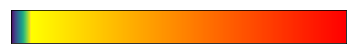

In [28]:
big_c = np.int(128*(np.log(misfit_max) - np.log([misfit_cut]))/(np.log(misfit_cut) - np.log([misfit_min])))
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
colors2 = plt.cm.autumn_r(np.linspace(0, 1, big_c))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
plt.imshow([colors], extent=[0, 10, 0, 1])
plt.xticks([])
plt.yticks([])
plt.show()

In [29]:
# want the medain of all from data_NA_cut
# first Na2
nansen_calc = st.median(data_NA_cut[1,0:i_cut])
rossby_calc = st.median(data_NA_cut[2,0:i_cut])
thO_calc    = st.median(data_NA_cut[3,0:i_cut])
thA_O_calc  = st.median(data_NA_cut[4,0:i_cut])
print('Nansen set',np.sqrt(nansen_use),'and calculated',np.sqrt(data_NA['Na'][misfit_min_no]),np.sqrt(nansen_calc))
print('Rossby set',rossby_use,'and calculated',data_NA['Ro'][misfit_min_no],rossby_calc)
print('ThetaA set',np.rad2deg(ThetaA),'and calculated',
      np.rad2deg(data_NA['thA-O'][misfit_min_no]+data_NA['thO'][misfit_min_no]),np.rad2deg(thA_O_calc + thO_calc))
print('ThetaO set',np.rad2deg(ThetaO),'and calculated',np.rad2deg(data_NA['thO'][misfit_min_no]),np.rad2deg(thO_calc))
print('ThetaA - O set',np.rad2deg(ThetaA - ThetaO),'and calculated',np.rad2deg(data_NA['thA-O'][misfit_min_no]),np.rad2deg(thA_O_calc))
print('Ca calculated',(data_NA['Na'][misfit_min_no]/data_NA['Ro'][misfit_min_no])*(rhoi/rhoa))
print('Co calculated',(rhoi/rhoo)/data_NA['Ro'][misfit_min_no])
print('Ca calculated',(nansen_calc/rossby_calc*(rhoi/rhoa)))
print('Co calculated',(rhoi/rhoo)/rossby_calc)

Nansen set 0.02468120324 and calculated 0.0257625166861 0.0258008018868
Rossby set 89.37621832358674 and calculated 101.804161 101.801811
ThetaA set 5.0 and calculated 24.9357980738 24.934199808
ThetaO set 20.0 and calculated 42.3386522145 42.3390654317
ThetaA - O set -15.0 and calculated -17.4028541407 -17.4048656237
Ca calculated 0.00478266944646
Co calculated 0.00877923038171
Ca calculated 0.00479700561418
Co calculated 0.00877943304207


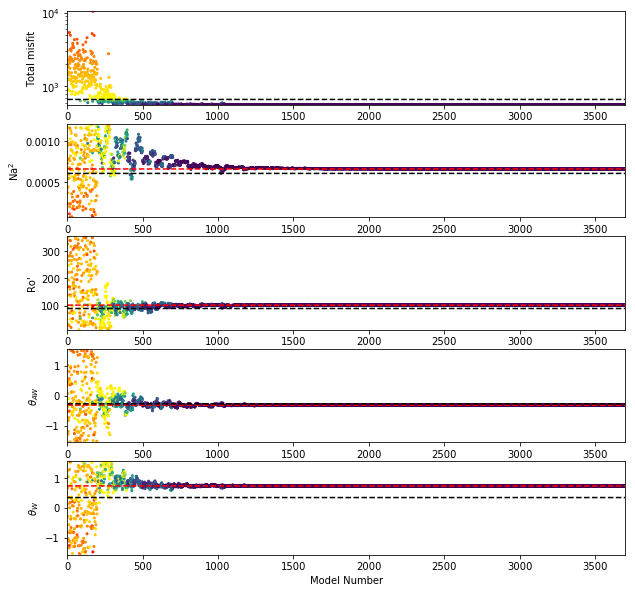

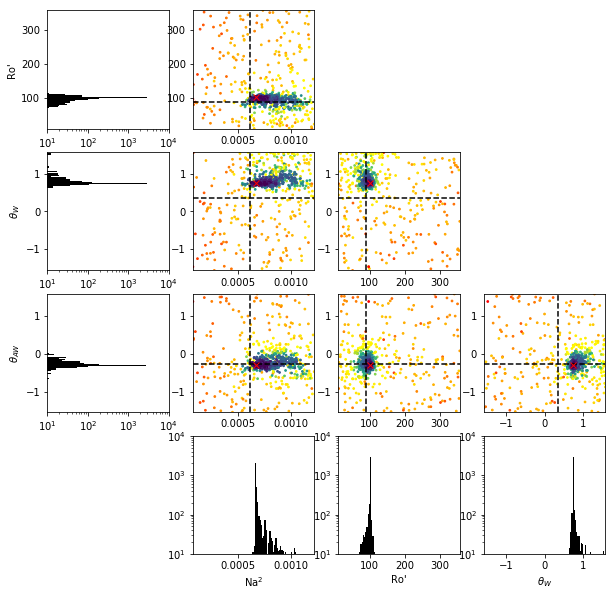

In [30]:
fig_location = '/Users/H/Documents/Tex/Reports/18-06-02/'
# plot misfit
# cmin = 1e-10
# cmax = 1e2
plt.figure(figsize=[10,10])
plt.subplot(5,1,1)
cmin = misfit_min
# cmin = 1e-4
cmax = misfit_max
plt.scatter(data_NA['number'],data_NA['misfit'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[misfit_cut for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.yscale('log')
plt.ylim([cmin,np.max(data_NA['misfit'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Total misfit')

plt.subplot(5,1,2)
plt.scatter(data_NA['number'],data_NA['Na'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Na'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[nansen_use for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'Na$^2$')
# plt.savefig('misfit_all_100%.pdf')
plt.subplot(5,1,3)
plt.scatter(data_NA['number'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Ro'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[rossby_use for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Ro\'')
plt.subplot(5,1,4)
plt.scatter(data_NA['number'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thA-O'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[ThetaA-ThetaO for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{AW}$')
plt.subplot(5,1,5)
plt.scatter(data_NA['number'],data_NA['thO'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thO'][misfit_min_no] for j in range(data_NA['number'][-1])],'--r')
plt.plot(data_NA['number'],[ThetaO for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{W}$')
plt.xlabel('Model Number')
plt.show()
# plot trade off
th1 = ThetaO
th2 = ThetaA - ThetaO
# x - Na y - Ro
f = plt.figure(figsize=[10,10])
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])#*0.1
# cmax = 1e7
# horizontal hists
plt.subplot(4,4,1)
plt.hist(data_NA['Ro'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel('Ro\'')
plt.subplot(4,4,5)
plt.hist(data_NA['thO'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel(r'$\theta_{W}$')
plt.subplot(4,4,9)
plt.hist(data_NA['thA-O'],bins=100,color='k',orientation='horizontal')
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.xscale('log')
plt.xlim([1e1,1e4])
plt.ylabel(r'$\theta_{AW}$')
# x - Na y - Ro
plt.subplot(4,4,2)
plt.scatter(data_NA['Na'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('Ro')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*rossby_use for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['Ro']),np.max(data_NA['Ro'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['Ro'][misfit_min_no],'xr')
# x - Na y - thA
plt.subplot(4,4,6)
plt.scatter(data_NA['Na'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('thO')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Ro y - thA
plt.subplot(4,4,7)
plt.scatter(data_NA['Ro'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th1 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# x - Na y - thO
plt.subplot(4,4,10)
plt.scatter(data_NA['Na'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
# plt.ylabel('thA-O')
plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - Ro y - thO
plt.subplot(4,4,11)
plt.scatter(data_NA['Ro'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# x - thA y - thO
plt.subplot(4,4,12)
plt.scatter(data_NA['thO'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.plot([np.min(data_NA['thO']),np.max(data_NA['thO'])],[i*th2 for i in [1,1]],'--k')
plt.plot([i*th1 for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['thO'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# bottom row histograms
plt.subplot(4,4,14)
plt.hist(data_NA['Na'],bins=100,color='k')
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel(r'Na$^2$')
plt.subplot(4,4,15)
plt.hist(data_NA['Ro'],bins=100,color='k')
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel('Ro\'')
plt.subplot(4,4,16)
plt.hist(data_NA['thO'],bins=100,color='k')
plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.yscale('log')
plt.ylim([1e1,1e4])
plt.xlabel(r'$\theta_{W}$')
f.savefig(fig_location+'trade_off_A_OI_FB.pdf',format='pdf',bbox__inches='tight')
plt.show()
# plt.savefig('trade_off_all_100%.pdf')


In [48]:
# disassemble vectors
# forcing_1
vec_strd = 10
all_vecs = np.empty([np.int((data_NA['number'][-1]-it1)/vec_strd+1),nbals,7])
jj = 0
for j in range(it1,data_NA['number'][-1],vec_strd):
# for j in range(misfit_min_no,misfit_min_no+1):
    for i in range(nbals):
        all_vecs[jj,i,0],all_vecs[jj,i,1] = freedrift.wnd_mag_geo(
                          uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
        all_vecs[jj,i,2],all_vecs[jj,i,3] = freedrift.o_i_mag_geo(
                          uwind[i],vwind[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
        all_vecs[jj,i,4],all_vecs[jj,i,5] = freedrift.geo_mag_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
        all_vecs[jj,i,6] = data_NA['misfit'][j]
    jj += 1
#     print(jj,j)
j = misfit_min_no
for i in range(nbals):
    all_vecs[jj,i,0],all_vecs[jj,i,1] = freedrift.wnd_mag_geo(
                      uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                      data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                      data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
    all_vecs[jj,i,2],all_vecs[jj,i,3] = freedrift.o_i_mag_geo(
                      uwind[i],vwind[i],ugeo[i],vgeo[i],
                      data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                      data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
    all_vecs[jj,i,4],all_vecs[jj,i,5] = freedrift.geo_mag_geo(
                      uwind[i],vwind[i],uo_i[i],vo_i[i],
                      data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                      data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
    all_vecs[jj,i,6] = data_NA['misfit'][j]


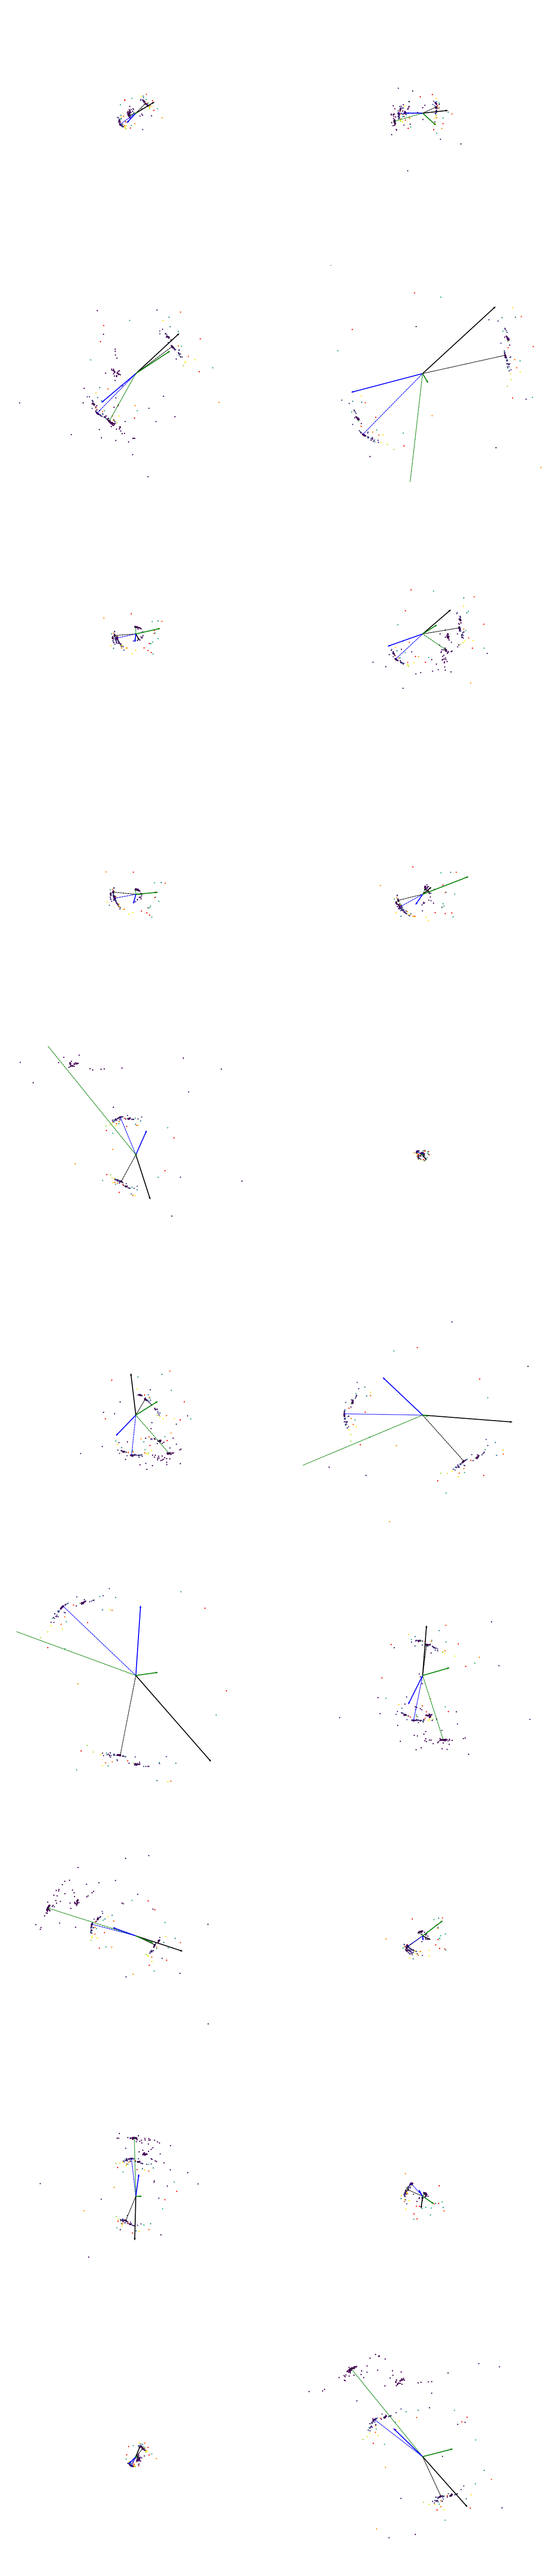

In [49]:
# want arrows for the obs and best, scatter all the rest with mymap
wnd_range = np.max(wind_mag)
wnd_range = 0.99*np.max(np.maximum(all_vecs[-1,:,0:2],wnd_range))
wnd_scale = 0.04
plt.figure(figsize=[20,5*nbals])
plt.rc('text', usetex=True)
for nb in range(nbals):
# for nb in range(nbals):
    ax = plt.subplot(nbals/2,2,nb+1)
#     #   calculated vectors
    # wind
    plt.scatter(wnd_scale*all_vecs[:,nb,0],wnd_scale*all_vecs[:,nb,1],c=np.log(all_vecs[:,nb,6]),s=3,cmap=mymap)
    plt.scatter(all_vecs[:,nb,2],all_vecs[:,nb,3],c=np.log(all_vecs[:,nb,6]),s=3,cmap=mymap)
    plt.scatter(all_vecs[:,nb,4],all_vecs[:,nb,5],c=np.log(all_vecs[:,nb,6]),s=3,cmap=mymap)
    plt.clim(np.log([cmin,cmax]))
# #     for j in tqdm(range(0,data_NA['number'][-1],10)):
# #         plt.arrow(0,0,wnd_scale*all_vecs[j,nb,0],wnd_scale*all_vecs[j,nb,1],
# #                    alpha=0.009,color='k')
# #         plt.arrow(0,0,all_vecs[j,nb,2],all_vecs[j,nb,3],
# #                    alpha=0.009,color='b')
# #         plt.arrow(0,0,all_vecs[j,nb,4],all_vecs[j,nb,5],
# #                    alpha=0.009,color='g')
    plt.arrow(0,0,wnd_scale*all_vecs[-1,nb,0],wnd_scale*all_vecs[-1,nb,1],
               length_includes_head = 'true',linestyle='dashed',color='k',alpha = 0.7)
    plt.arrow(0,0,all_vecs[-1,nb,2],all_vecs[-1,nb,3],
               length_includes_head = 'true',linestyle='dashed',color='b',alpha = 0.7)
    plt.arrow(0,0,all_vecs[-1,nb,4],all_vecs[-1,nb,5],
               length_includes_head = 'true',linestyle='dashed',color='g',alpha = 0.7)
#     #   original vectors
    plt.arrow(0,0,wnd_scale*uwind[nb],wnd_scale*vwind[nb],
              color='k',length_includes_head = 'true',width=0.0015)
    plt.arrow(0,0,uo_i[nb],vo_i[nb],
              color='b',length_includes_head = 'true',width=0.0015)
    plt.arrow(0,0,ugeo[nb],vgeo[nb],
              color='g',length_includes_head = 'true',width=0.0015)
    plt.xlim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
    plt.ylim([-wnd_range*wnd_scale,wnd_range*wnd_scale])
# #     plt.arrow(-wnd_scale/2,-wind_mag[nb]*wnd_scale/2,wnd_scale,0,
# #               color='k',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-3*wind_mag[nb]*wnd_scale/4,wnd_scale,0,
# # #               color='b',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-wnd_range*wnd_scale/2,wnd_scale,0,
# #               color='k',length_includes_head = 'true',width=0.0015)
# #     plt.arrow(-wnd_scale/2,-3*wnd_range*wnd_scale/4,wnd_scale,0,
# #               color='b',length_includes_head = 'true',width=0.0015)
# #     plt.text(wnd_scale,-wind_mag[nb]*wnd_scale/2,r'Wind $ = 1 $ m s$^{-1}$',fontsize=20,horizontalalignment='left')
# #     plt.text(wnd_scale,-3*wind_mag[nb]*wnd_scale/4,r'$\bf{U}_{WI}  = 2 $ cm s$^{-1}$',fontsize=20,horizontalalignment='left')
#     plt.text(wnd_scale,-wnd_range*wnd_scale/2,r'Wind $ = 1 $ m s$^{-1}$',fontsize=20,horizontalalignment='left')
#     plt.text(wnd_scale,-3*wnd_range*wnd_scale/4,r'$\bf{U}_{WI}  = 2 $ cm s$^{-1}$',fontsize=20,horizontalalignment='left')
    ax.axis('off')
plt.show()

In [20]:
# disassemble misfits
vec_strd = 10
all_misfits = np.empty([np.int((data_NA['number'][-1]-it1)/vec_strd),nbals,5])
# for j in tqdm(data_NA['number']-1):
jj = 0
for j in range(it1,data_NA['number'][-1],vec_strd):
    for i in range(nbals):
        all_misfits[jj,i,0] = freedrift.misfit_wnd_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_a[i]/wind_sig_use[i]**2
        all_misfits[jj,i,1] = freedrift.misfit_o_i_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_i[i]/o_i_sig_use[i]**2
        all_misfits[jj,i,2] = freedrift.misfit_geo_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j],data_NA['Ro'][j]*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_g[i]/geo_sig_use[i]**2
        fb_ratio = np.max([wind_sig_use[i]/wind_mag[i],
                     o_i_sig_use[i]/o_i_mag[i], 
                     geo_sig_use[i]/geo_mag[i]]) 
        all_misfits[jj,i,3] = freedrift.misfit_fb_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
                          data_NA['Na'][j]*data_NA['Ro'][j]/rhoi,
                          rhoi/data_NA['Ro'][j],rhoi*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                )*beta_fb[i]/fb_ratio**2
        all_misfits[jj,i,4] = data_NA['misfit'][j]
    jj += 1

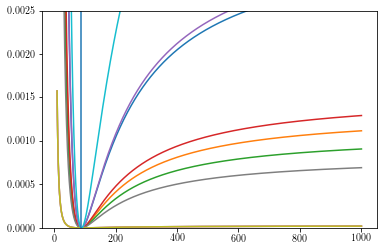

In [98]:
test_space = np.linspace(1e1,1e3,1000)
test_result = np.empty([1000,nbals])
i = 10
j = misfit_min_no
for k in range(1000):
    for i in range(nbals):
        test_result[k,i] =  freedrift.misfit_geo_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],ugeo[i],vgeo[i],
#                           data_NA['Na'][j],test_space[k]*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                          nansen_use,test_space[k]*hifc[i],
                          ThetaA,ThetaO
                )

plt.plot(test_space,test_result[:,:])
plt.ylim([0,0.0025])
# plt.axvline(x=data_NA['Ro'][j])
plt.axvline(x=rossby_use)
plt.show()

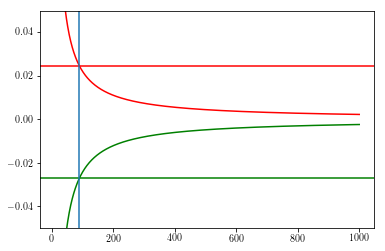

In [95]:
test_space = np.linspace(1e1,1e3,1000)
test_result = np.empty([1000,2])
i = 1
j = misfit_min_no
for k in range(1000):
    test_result[k,:] =  freedrift.geo_mag_geo(
                          uwind[i],vwind[i],uo_i[i],vo_i[i],
#                           data_NA['Na'][j],test_space[k]*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j]
                          nansen_use,test_space[k]*hifc[i],
                          ThetaA,ThetaO
                )
plt.plot(test_space,test_result[:,0],'r')
plt.plot(test_space,test_result[:,1],'g')
plt.axhline(y=1*ugeo[i],c='r')
plt.axhline(y= vgeo[i],c='g')
plt.axvline(x=rossby_use)
plt.ylim([-0.05,0.05])
plt.show() 

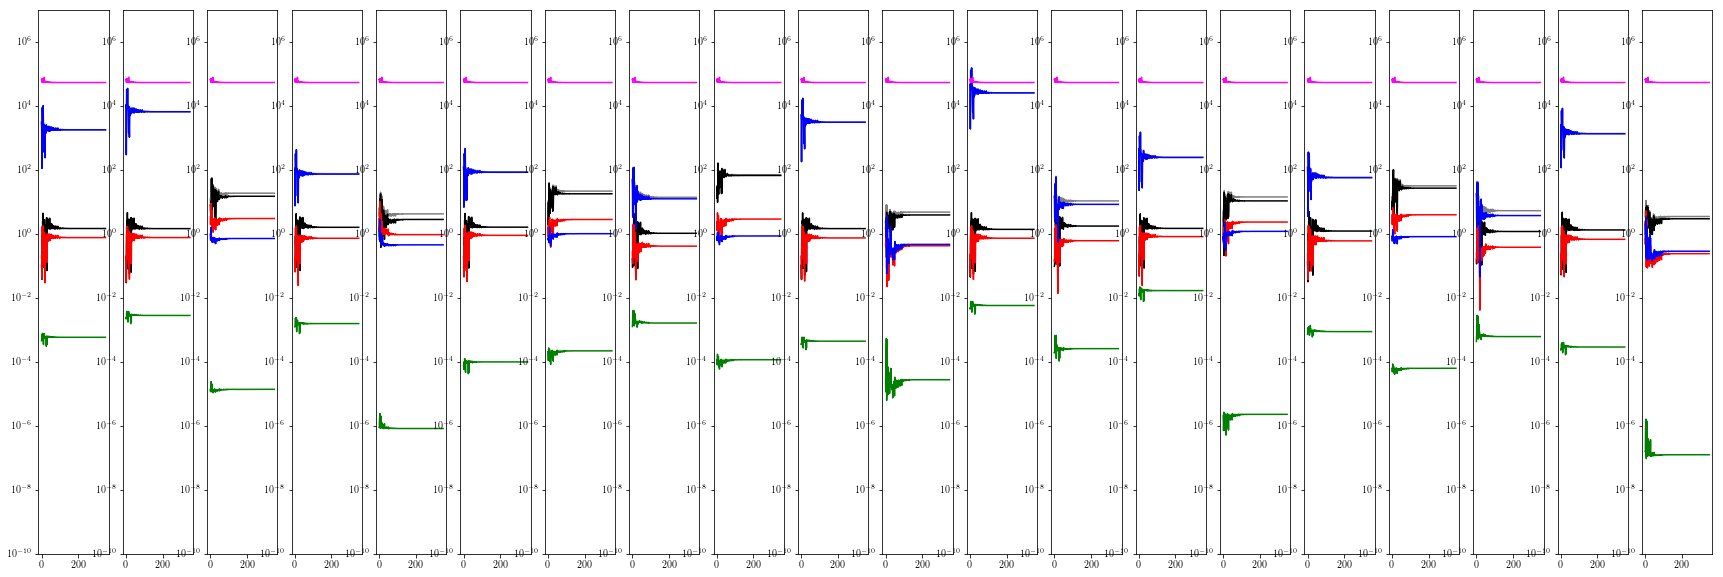

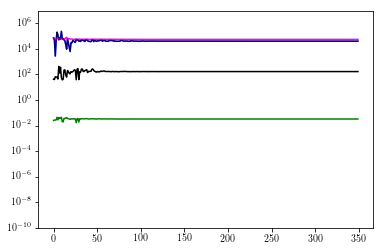

In [334]:
# plot misfit
plt.figure(figsize=[30,10])
cmin = 1e-10
# cmin = misfit_min*1e-3
# cmin = 1e-4
# cmax = misfit_max
cmax = 1e7
# cmin = 1e-12
for i in range(nbals):
    plt.subplot(1,nbals,i+1)
# for i in range(0,3):
#     plt.subplot(1,3,i+1)
    plt.plot(all_misfits[:,i,0],alpha = 1.0,c='k')
    plt.plot(np.sum(all_misfits[:,i,0:3],axis=1),c='k',alpha=0.5)
    plt.plot(all_misfits[:,i,1],alpha = 1.0,c='r')
    plt.plot(all_misfits[:,i,2],alpha = 1.0,c='b')
    plt.plot(all_misfits[:,i,3],alpha = 1.0,c='g')
    plt.plot(all_misfits[:,1,4],c=[1,0,1])
    plt.yscale('log')
    plt.ylim([cmin,cmax])
plt.show()

plt.plot(np.sum(all_misfits[:,:,0],axis=1),c='k')
# plt.plot(np.sum(all_misfits[:,:,1],axis=1),c='r')
plt.plot(np.sum(all_misfits[:,:,2],axis=1),c='b')
plt.plot(np.sum(all_misfits[:,:,3],axis=1),c='g')
plt.plot(all_misfits[:,0,4],c=[1,0,1])
plt.plot(np.sum(np.sum(all_misfits[:,:,0:4],axis=2),axis=1),c='k',alpha=0.5)
plt.ylim([cmin,cmax])
plt.yscale('log')
# plt.savefig('misfit_sep_100%.pdf')
plt.show()

In [218]:
# disassemble forces
# forcing_1
all_forces = np.empty([np.int((data_NA['number'][-1]-it1)/vec_strd+1),nbals,7])
# for j in tqdm(data_NA['number']-1):
# for j in range(data_NA['number'][-1]-10,data_NA['number'][-1]-1):
# for j in tqdm(data_NA['number']-1):
jj = 0
for j in range(it1,data_NA['number'][-1],vec_strd):
# for j in range(misfit_min_no-1,misfit_min_no+1):
    for i in range(nbals):
        [all_forces[jj,i,0],all_forces[jj,i,1],all_forces[jj,i,2],
         all_forces[jj,i,3],all_forces[jj,i,4],all_forces[jj,i,5]] = freedrift.force_bal(
                          uwind[i],vwind[i],ui_o[i],vi_o[i],
                          data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#         all_forces[jj,i,:] = freedrift.force_bal(
#                           all_vecs[jj,i,0],all_vecs[jj,i,1],all_vecs[jj,i,2],all_vecs[jj,i,3],
#                           data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
        all_forces[jj,i,6] = data_NA['misfit'][j]
    jj += 1
#     print(jj,j)
j = misfit_min_no
for i in range(nbals):
    [all_forces[jj,i,0],all_forces[jj,i,1],all_forces[jj,i,2],
     all_forces[jj,i,3],all_forces[jj,i,4],all_forces[jj,i,5]] = freedrift.force_bal(
                          uwind[i],vwind[i],ui_o[i],vi_o[i],
                          data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
                          data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
#         all_forces[jj,i,:] = freedrift.force_bal(
#                           all_vecs[jj,i,0],all_vecs[jj,i,1],all_vecs[jj,i,2],all_vecs[jj,i,3],
#                           data_NA['Na'][j]/data_NA['Ro'][j]*rhoi,rhoi/data_NA['Ro'][j],rhoi*hifc[i],
#                           data_NA['thA-O'][j]+data_NA['thO'][j],data_NA['thO'][j])
    all_forces[jj,i,6] = data_NA['misfit'][j] 
    

NameError: name 'ui_o' is not defined

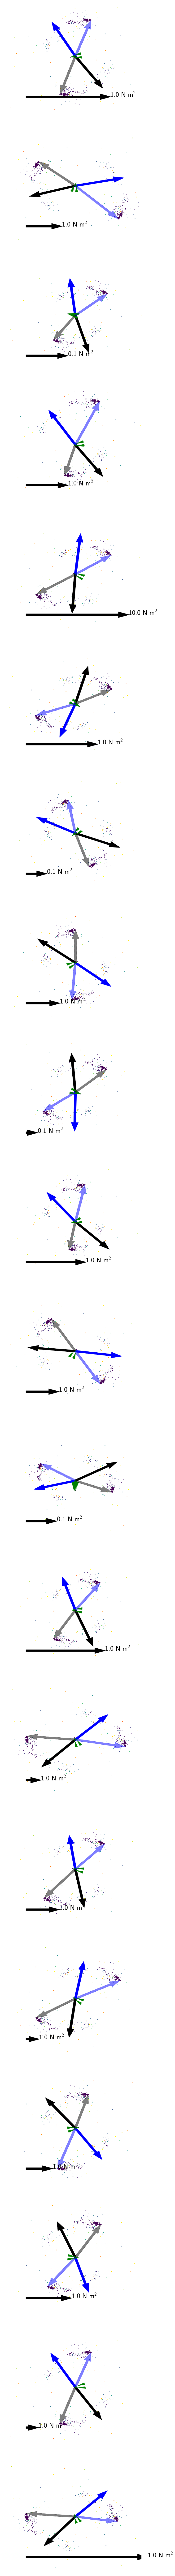

In [568]:
leg_len = np.ndarray([nbals])
for i in range(nbals):
    leg_len[i] = 10.0**np.ceil(np.log10((np.hypot(all_forces[-1,i,0],all_forces[-1,i,1]))))
# leg_len

wnd_scale = 55
force_scale = 40
plt.figure(figsize=[10,10*nbals])
# plt.figure(figsize=[10,10])
for nb in range(nbals):
   
    ax = plt.subplot(nbals,1,nb+1)
#     plt.subplot(1,1,1)

    plt.arrow(0,0,force_scale*orig_forces[nb,0],force_scale*orig_forces[nb,1],
               color='k',width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*orig_forces[nb,2],force_scale*orig_forces[nb,3],
               color='b',width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*orig_forces[nb,4],force_scale*orig_forces[nb,5],
               color='g',width = force_magw[nb]*2,length_includes_head = 'true')

    plt.arrow(0,0,force_scale*all_forces[-1,nb,0],force_scale*all_forces[-1,nb,1],
               linestyle='dashed',color='k',alpha =0.5,width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*all_forces[-1,nb,2],force_scale*all_forces[-1,nb,3],
               linestyle='dashed',color='b',alpha =0.5,width = force_magw[nb]*2,length_includes_head = 'true')
    plt.arrow(0,0,force_scale*all_forces[-1,nb,4],force_scale*all_forces[-1,nb,5],
               linestyle='dashed',color='g',alpha =0.5,width = force_magw[nb]*2,length_includes_head = 'true')
    plt.scatter(force_scale*all_forces[:,nb,0],force_scale*all_forces[:,nb,1],c=np.log(all_forces[:,nb,6]),s=3,cmap=mymap)
    plt.scatter(force_scale*all_forces[:,nb,2],force_scale*all_forces[:,nb,3],c=np.log(all_forces[:,nb,6]),s=3,cmap=mymap)
    plt.scatter(force_scale*all_forces[:,nb,4],force_scale*all_forces[:,nb,5],c=np.log(all_forces[:,nb,6]),s=3,cmap=mymap)
#     #   original vectors
#     plt.arrow(0,0,wnd_scale*uwind[nb],wnd_scale*vwind[nb],color='k')
#     plt.arrow(0,0,-ui_o[nb],-vi_o[nb],color='b')
    plt.xlim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
    plt.ylim([-wnd_scale*force_magw[nb],wnd_scale*force_magw[nb]])
    plt.arrow(-3*wnd_scale*force_magw[nb]/4,-3*wnd_scale*force_magw[nb]/4,leg_len[nb]*1e1,0,
              color='k',width = force_magw[nb]*2,length_includes_head = 'true')
    plt.text(-3*wnd_scale*force_magw[nb]/4+leg_len[nb]*1e1,-3*wnd_scale*force_magw[nb]/4,
             str(leg_len[nb])+' N m$^2$',fontsize=30,horizontalalignment='left')
#     plt.ylim([1.1*np.min(np.hstack((wnd_scale*uwind[nb],-ui_o[nb],wnd_scale*vwind[nb],-vi_o[nb],-0.02))),
#         1.1*np.max(np.hstack((wnd_scale*uwind[nb],-ui_o[nb],wnd_scale*vwind[nb],-vi_o[nb],0.02)))]) 
    ax.axis('off')
plt.show()